# Interpolation by splines



We will use the functions for solving system with tridiagonal matrix

In [1]:
def LUdecomptridiagonal(a,b,c):
    n=len(b)
    for k in range(1,n):
        mu=a[k-1]/b[k-1]
        b[k]=b[k]-mu*c[k-1]
        a[k-1]=mu
    return a,b,c

def LUsolvetridiagonal(a,b,c,f):
    n=len(b)
    for k in range(1,n):
        f[k]=f[k]-a[k-1]*f[k-1]
    f[n-1]=f[n-1]/b[n-1]
    for k in range(n-2,-1,-1):
        f[k]=(f[k]-c[k]*f[k+1])/b[k]
    return f



In the following code, we compute the coefficients $ \gamma $ for a natural cubic spline that interpolates the data xData and yData, and then compute the value of $s(1.5)$. To do this, it is necessary to calculate the corresponding coefficients of the polynomial on the segment where the point is located. You can find  this example in the video, and part of the implementation is taken from the literature

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

xData=np.array([1 ,2 , 3, 4, 5])
yData=np.array([0,1, 0, 1, 0])

def gamma_calc(xData,yData):
    n=len(xData)-1
    lower_diag=np.zeros(n)
    main_diag=np.ones(n+1)
    upper_diag=np.zeros(n)
    gamma=np.zeros(n+1)
    lower_diag[0:n-1]=xData[0:n-1]-xData[1:n]
    main_diag[1:n]=2.0*(xData[0:n-1]-xData[2:n+1])
    upper_diag[1:n]=xData[1:n]-xData[2:n+1]
    gamma[1:n] =6.0*(yData[0:n-1]-yData[1:n])/(xData[0:n-1] - xData[1:n])-6.0*(yData[1:n] - yData[2:n+1])/(xData[1:n] - xData[2:n+1])
    LUdecomptridiagonal(lower_diag,main_diag,upper_diag)
    LUsolvetridiagonal(lower_diag,main_diag,upper_diag,gamma)
    return gamma

def evalSpline(xData,yData,k,x):
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft)<= 1: return iLeft
            i =int((iLeft + iRight)/2)
            if x < xData[i]: iRight = i
            else: iLeft = i
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0 + (yData[i]*(x - xData[i+1])- yData[i+1]*(x - xData[i]))/h
    return y

gamma=gamma_calc(xData,yData)
evalSpline(xData,yData,gamma,1.5)


0.7678571428571428

In the next part of the lecture, we will solve exercises related to spline interpolation.

In [7]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("efwGO_KD_eQ")
display(vid)

In the next part of the lecture, we introduce the important properties of a cubic spline.



*Literatura po kojoj je izrađen dio predavanja: Jan Kiussalas: Numerical methods in engineering with Python, Cambridge University press*

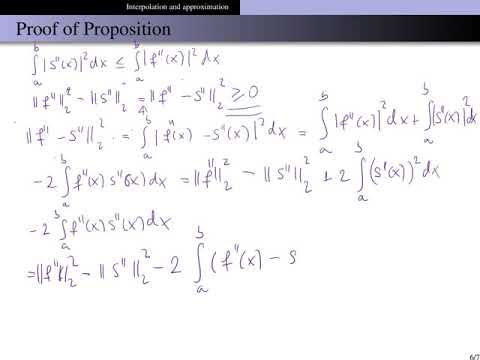

In [5]:
vid = YouTubeVideo("NP9FLoOjaQY")
display(vid)

# Introduction to numerical integration

In the next part of the lecture, we introduce Newton-Cotes formulas


In [6]:
vid = YouTubeVideo("7mjRGj3x2Qk")
display(vid)